In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

Using TensorFlow backend.


In [2]:
os.chdir("C:/Users/rakshith/Desktop/DataSets/KAGGLE")

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
train_data.shape , test_data.shape

((891, 12), (418, 11))

In [5]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
test_data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [14]:
test_data['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Missing Value Analysis

In [17]:
missin_df=pd.DataFrame(train_data.isnull().sum())
missin_df

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
missin_df=missin_df.reset_index()
missin_df.columns=['Feature','missing_count']
missin_df

,Feature,missing_count
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [19]:
train_name=train_data[['Name']]
test_name=test_data[['Name']]

In [20]:
# since cabin has most data as null values, it wpuld be dropped along with passenger id
train_data=train_data.drop(['PassengerId','Cabin','Name'],axis=1)
test_data=test_data.drop(['PassengerId','Cabin','Name'],axis=1)

In [21]:
print("embarked equal to s is {}".format(sum(train_data['Embarked']=='S')))
print("embarked equal to c is {}".format(sum(train_data['Embarked']=='C')))
print("embarked equal to q is {}".format(sum(train_data['Embarked']=='Q')))

embarked equal to s is 644
embarked equal to c is 168
embarked equal to q is 77


In [22]:
train_data.loc[1,'Age'],train_data.loc[5,'Age'],train_data.loc[56,'Age'],train_data.loc[543,'Age'],train_data.loc[453,'Age']

(38.0, nan, 21.0, 32.0, 49.0)

In [23]:
## Imputing The age column based on the class that they are travelling in
train_data[train_data['Pclass']==1]['Age'].mean()

38.233440860215055

In [24]:
def Imputation(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train_data[train_data['Pclass']==1]['Age'].mean()
        elif Pclass == 2:
            return train_data[train_data['Pclass']==2]['Age'].mean()
        else:
            return train_data[train_data['Pclass']==3]['Age'].mean()
    else:
        return Age

In [25]:
train_data['Age']=train_data[['Age','Pclass']].apply(Imputation,axis=1)

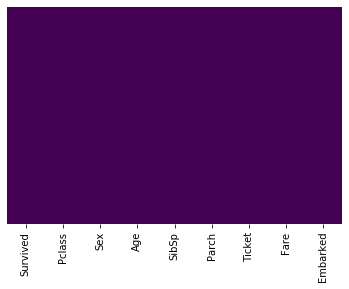

In [26]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

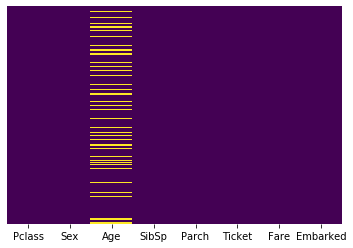

In [27]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
test_data['Age']=test_data[['Age','Pclass']].apply(Imputation,axis=1)

In [29]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [30]:
test_data['Fare']=test_data['Fare'].fillna(test_data[test_data['Pclass']==3]['Fare'].median()) 

In [31]:
#train_data_copy=pd.DataFrame(KNN(k=3).fit_transform(train_data_copy),columns=train_data_copy.columns)

In [32]:
#train_data_copy.loc[1,'Age'],train_data_copy.loc[5,'Age'],train_data_copy.loc[56,'Age'],train_data_copy.loc[543,'Age'],train_data_copy.loc[453,'Age']

In [33]:
print("Maximum passengers are of age ",train_data['Age'].mode())
print("passengers with age equal to 24 is {}".format(sum(train_data['Age']==24)))

Maximum passengers are of age  0    25.14062
dtype: float64
passengers with age equal to 24 is 30


In [34]:
train_data['Age'].mean() , train_data['Age'].median()

(29.29287479027204, 26.0)

In [35]:
#will impute age with KNN values
#train_data=pd.DataFrame(KNN(k=3).fit_transform(train_data),columns=train_data.columns)

In [36]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [37]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [38]:
# Handling missing data in test data
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [39]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [40]:
Male=pd.get_dummies(train_data['Sex'],drop_first=True)

In [41]:
Embark=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [42]:
train_data=pd.concat([train_data,Male,Embark],axis=1)
train_data.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,male,22.00000,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,female,38.00000,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,female,35.00000,1,0,113803,53.1000,S,0,0,1
4,0,3,male,35.00000,0,0,373450,8.0500,S,1,0,1
5,0,3,male,25.14062,0,0,330877,8.4583,Q,1,1,0


In [43]:
Male=pd.get_dummies(test_data['Sex'],drop_first=True)
Embark=pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data=pd.concat([test_data,Male,Embark],axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,330911,7.8292,Q,1,1,0
1,3,female,47.0,1,0,363272,7.0000,S,0,0,1
2,2,male,62.0,0,0,240276,9.6875,Q,1,1,0
3,3,male,27.0,0,0,315154,8.6625,S,1,0,1
4,3,female,22.0,1,1,3101298,12.2875,S,0,0,1


In [44]:
for i in range(0,train_data.shape[1]):
    if (train_data.iloc[:,i].dtypes == 'object'):
        train_data.iloc[:,i]=pd.Categorical(train_data.iloc[:,i])
        print(i)
        train_data.iloc[:,i]=train_data.iloc[:,i].cat.codes

2
6
8


In [45]:
for i in range(0,test_data.shape[1]):
    if (test_data.iloc[:,i].dtypes == 'object'):
        test_data.iloc[:,i]=pd.Categorical(test_data.iloc[:,i])
        print(i)
        test_data.iloc[:,i]=test_data.iloc[:,i].cat.codes

1
5
7


In [46]:
#test_data=pd.DataFrame(KNN(k=3).fit_transform(test_data),columns=test_data.columns)

In [47]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,1,22.0,1,0,523,7.2500,2,1,0,1
1,1,1,0,38.0,1,0,596,71.2833,0,0,0,0
2,1,3,0,26.0,0,0,669,7.9250,2,0,0,1
3,1,1,0,35.0,1,0,49,53.1000,2,0,0,1
4,0,3,1,35.0,0,0,472,8.0500,2,1,0,1


In [48]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,3,1,34.5,0,0,152,7.8292,1,1,1,0
1,3,0,47.0,1,0,221,7.0000,2,0,0,1
2,2,1,62.0,0,0,73,9.6875,1,1,1,0
3,3,1,27.0,0,0,147,8.6625,2,1,0,1
4,3,0,22.0,1,1,138,12.2875,2,0,0,1


In [49]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,1,22.0,1,0,523,7.2500,2,1,0,1
1,1,1,0,38.0,1,0,596,71.2833,0,0,0,0
2,1,3,0,26.0,0,0,669,7.9250,2,0,0,1
3,1,1,0,35.0,1,0,49,53.1000,2,0,0,1
4,0,3,1,35.0,0,0,472,8.0500,2,1,0,1


In [50]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,3,1,34.5,0,0,152,7.8292,1,1,1,0
1,3,0,47.0,1,0,221,7.0000,2,0,0,1
2,2,1,62.0,0,0,73,9.6875,1,1,1,0
3,3,1,27.0,0,0,147,8.6625,2,1,0,1
4,3,0,22.0,1,1,138,12.2875,2,0,0,1


In [51]:
min(train_data['Age']),max(train_data['Age'])
min(test_data['Age']),max(test_data['Age'])

(0.17, 76.0)

In [52]:
train_data['Age']=round(train_data['Age'])

In [53]:
test_data['Age']=round(test_data['Age'])

In [54]:
min(train_data['Age']),max(train_data['Age'])

(0.0, 80.0)

In [55]:
min(test_data['Age']),max(test_data['Age'])

(0.0, 76.0)

In [56]:
train_data['Age']=np.where(train_data['Age']==0,1,train_data['Age'])
test_data['Age']=np.where(test_data['Age']==0,1,test_data['Age'])

In [57]:
min(train_data['Age']),max(train_data['Age'])

(1.0, 80.0)

In [58]:
min(test_data['Age']),max(test_data['Age'])

(1.0, 76.0)

In [59]:
min(train_data['Ticket']), max(train_data['Ticket'])

(0, 680)

C:\Users\rakshith\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


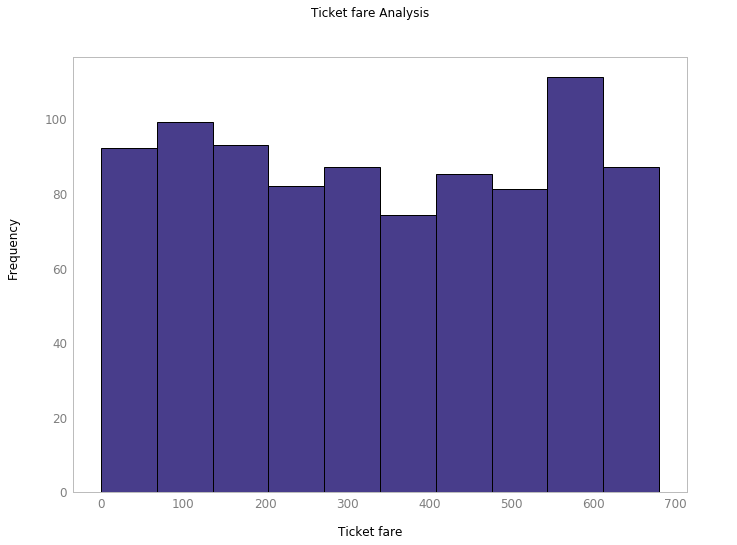

<ggplot: (192761131773)>

In [60]:
ggplot(train_data,aes(x='Ticket'))+\
geom_histogram(fill='DarkslateBlue',color='black')+\
geom_density()+\
theme_bw() + xlab("Ticket fare") + ylab("Frequency") + ggtitle("Ticket fare Analysis") +\
    theme(text=element_text(size=20))

In [61]:
print('Ticket fare equalt to 0 is {}'.format(sum(train_data['Ticket']==0)))

Ticket fare equalt to 0 is 3


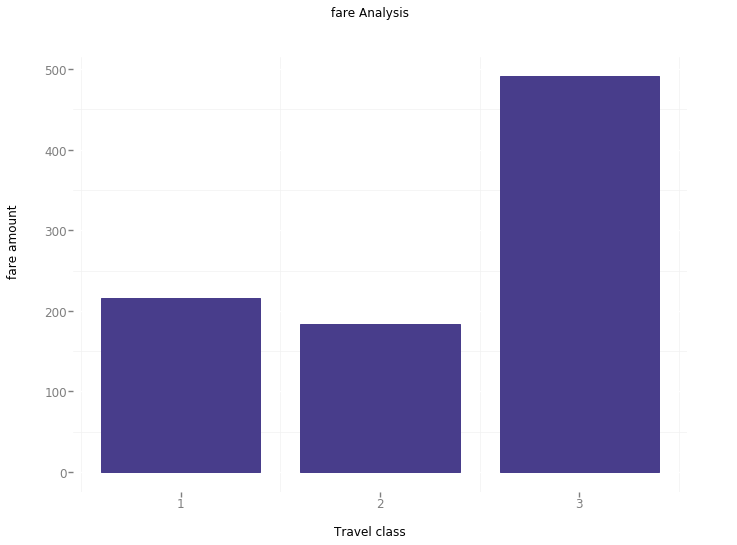

<ggplot: (-9223371844093482166)>

In [62]:
ggplot(train_data, aes(x='Pclass', y='Ticket')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Travel class") + ylab("fare amount") + ggtitle("fare Analysis") + theme_bw()

In [63]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [64]:

#col_names=test_data.columns[(test_data.columns != 'SibSp') & (test_data.columns != 'Parch')]
col_names=['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked']

In [65]:
data = [train_data,test_data]
for df in data:
    for col in col_names:
        print(col)
        q25,q75=np.percentile(df[col],[25,75])
        iqr=q75-q25
        minimum=q25-iqr*1.5
        maximum=q75+iqr*1.5
        df[col]=np.where(df[col]>maximum,maximum,df[col])
        df[col]=np.where(df[col]<minimum,minimum,df[col])

Pclass
Sex
Age
Ticket
Fare
Embarked
Pclass
Sex
Age
Ticket
Fare
Embarked


In [66]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Feature Engineering

In [67]:
data=[train_data,test_data]
for df in data:
    df['age_cat'] = 0
    df.loc[(df['Age']>5) & (df['Age']<=10),'age_cat'] = 1
    df.loc[(df['Age']>10) & (df['Age']<=22), 'age_cat'] = 2
    df.loc[(df['Age']>22) & (df['Age']<=55), 'age_cat'] = 3
    df.loc[(df['Age']>55),'age_cat'] = 4

In [68]:
train_data.shape,test_data.shape

((891, 13), (418, 12))

In [69]:
train_data.dtypes

Survived      int64
Pclass      float64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Embarked    float64
male          uint8
Q             uint8
S             uint8
age_cat       int64
dtype: object

In [70]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,age_cat
0,3.0,1.0,34.0,0,0,152.0,7.8292,1.0,1,1,0,3
1,3.0,0.0,47.0,1,0,221.0,7.0000,2.0,0,0,1,3
2,2.0,1.0,55.5,0,0,73.0,9.6875,1.0,1,1,0,4
3,3.0,1.0,27.0,0,0,147.0,8.6625,2.0,1,0,1,3
4,3.0,0.0,22.0,1,1,138.0,12.2875,2.0,0,0,1,2


In [71]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,age_cat
0,0,3.0,1.0,22.0,1,0,523.0,7.2500,2.0,1,0,1,2
1,1,1.0,0.0,38.0,1,0,596.0,65.6344,0.0,0,0,0,3
2,1,3.0,0.0,26.0,0,0,669.0,7.9250,2.0,0,0,1,3
3,1,1.0,0.0,35.0,1,0,49.0,53.1000,2.0,0,0,1,3
4,0,3.0,1.0,35.0,0,0,472.0,8.0500,2.0,1,0,1,3


In [72]:
data=[train_data,test_data]
for df in data:
    df['Family_Size']=0
    df.loc[(train_data['Parch']>1) & (df['Parch']<=3),'Family_Size']=1
    df.loc[(train_data['Parch']>3) & (df['Parch']<=5),'Family_Size']=2
    df.loc[(train_data['Parch']>5), 'Family_Size']=3

In [73]:

    data=[train_data,test_data]
    for data in data:
        data['Sib_Size']=0
        data.loc[(train_data['SibSp']>1) & (train_data['SibSp']<=3),'Sib_Size']=1
        data.loc[(train_data['SibSp']>3) & (train_data['SibSp']<=5),'Sib_Size']=2
        data.loc[(train_data['SibSp']>5), 'Sib_Size']=3

In [74]:

train_data['Total_fam_size']=train_data['Parch']+train_data['SibSp']
test_data['Total_fam_size']=test_data['Parch']+test_data['SibSp']

In [75]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,age_cat,Family_Size,Sib_Size,Total_fam_size
0,0,3.0,1.0,22.0,1,0,523.0,7.2500,2.0,1,0,1,2,0,0,1
1,1,1.0,0.0,38.0,1,0,596.0,65.6344,0.0,0,0,0,3,0,0,1
2,1,3.0,0.0,26.0,0,0,669.0,7.9250,2.0,0,0,1,3,0,0,0
3,1,1.0,0.0,35.0,1,0,49.0,53.1000,2.0,0,0,1,3,0,0,1
4,0,3.0,1.0,35.0,0,0,472.0,8.0500,2.0,1,0,1,3,0,0,0


In [76]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,age_cat,Family_Size,Sib_Size,Total_fam_size
0,3.0,1.0,34.0,0,0,152.0,7.8292,1.0,1,1,0,3,0,0,0
1,3.0,0.0,47.0,1,0,221.0,7.0000,2.0,0,0,1,3,0,0,1
2,2.0,1.0,55.5,0,0,73.0,9.6875,1.0,1,1,0,4,0,0,0
3,3.0,1.0,27.0,0,0,147.0,8.6625,2.0,1,0,1,3,0,0,0
4,3.0,0.0,22.0,1,1,138.0,12.2875,2.0,0,0,1,2,0,0,2


In [77]:
train_data.dtypes

Survived            int64
Pclass            float64
Sex               float64
Age               float64
SibSp               int64
Parch               int64
Ticket            float64
Fare              float64
Embarked          float64
male                uint8
Q                   uint8
S                   uint8
age_cat             int64
Family_Size         int64
Sib_Size            int64
Total_fam_size      int64
dtype: object

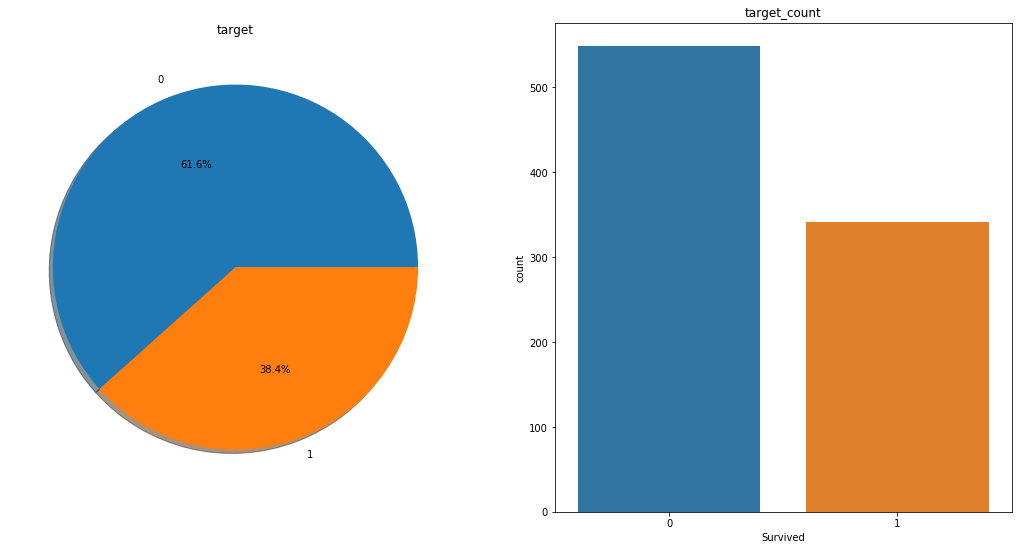

In [78]:
f,ax=plt.subplots(1,2,figsize=(18,9))
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('target_count')
plt.show()

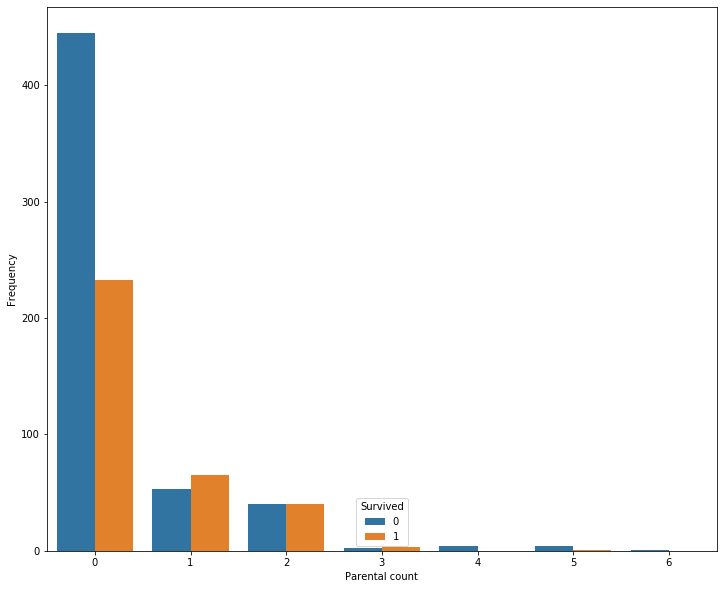

In [79]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('Parch',hue='Survived',data=train_data)
ax.set_xlabel('Parental count')
ax.set_ylabel('Frequency')
plt.show()

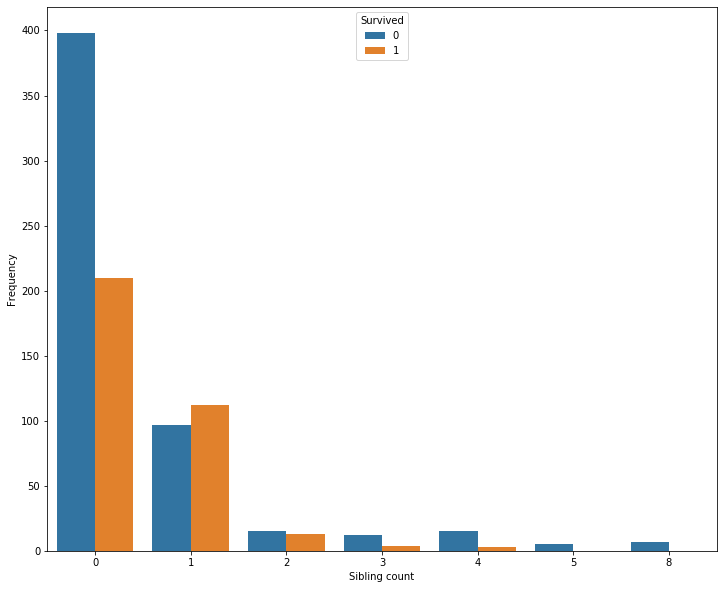

In [80]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('SibSp',hue='Survived',data=train_data)
ax.set_xlabel('Sibling count')
ax.set_ylabel('Frequency')
plt.show()

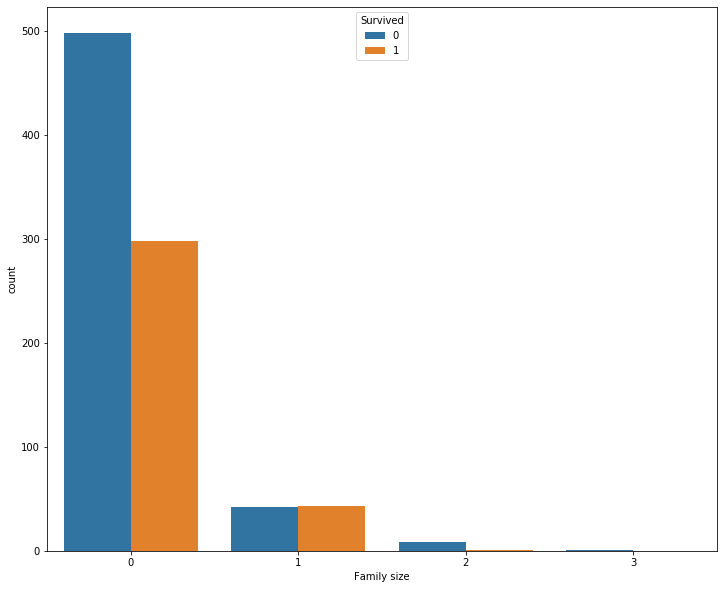

In [81]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('Family_Size',hue='Survived',data=train_data)
ax.set_xlabel('Family size')
ax.set_ylabel('count')
plt.show()

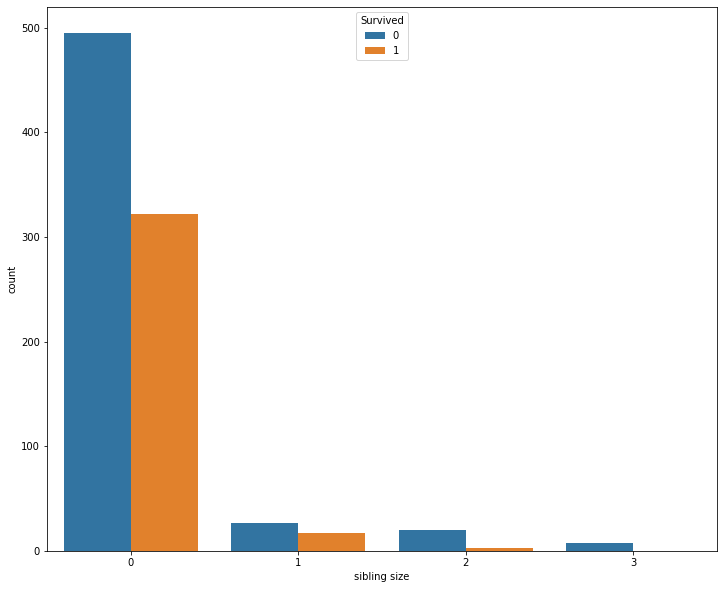

In [82]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('Sib_Size',hue='Survived',data=train_data)
ax.set_xlabel('sibling size')
ax.set_ylabel('count')
plt.show()

C:\Users\rakshith\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rakshith\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


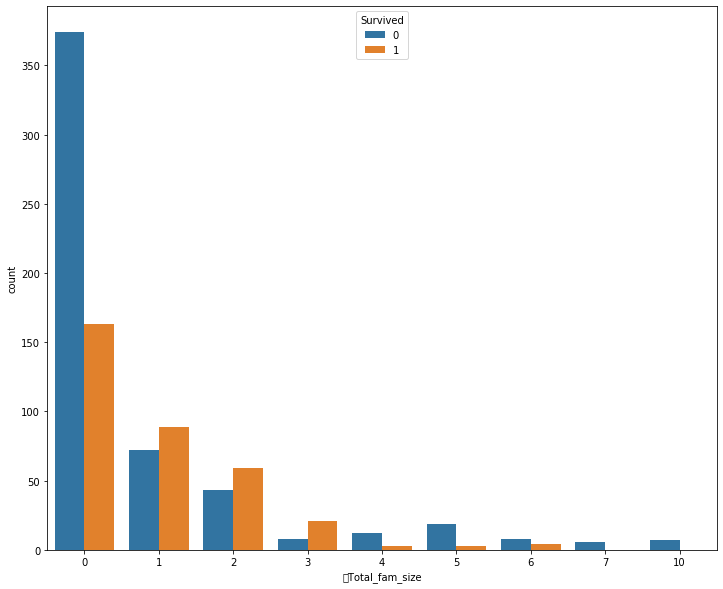

In [83]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('Total_fam_size',hue='Survived',data=train_data)
ax.set_xlabel('	Total_fam_size')
ax.set_ylabel('count')
plt.show()

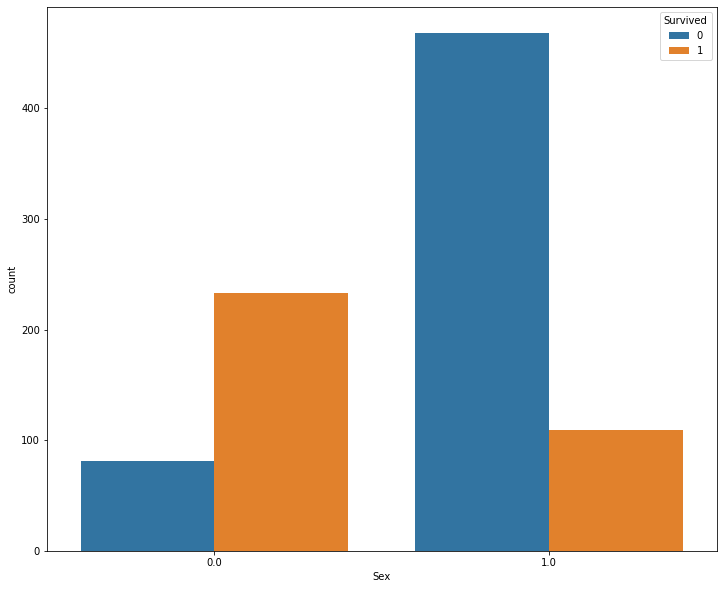

In [84]:
f,ax=plt.subplots(figsize=(12,10))
sns.countplot('Sex',hue='Survived',data=train_data)
ax.set_xlabel('Sex')
ax.set_ylabel('count')
plt.show()

In [85]:
fem_survival_chance=sum((train_data['Sex']==0) & (train_data['Survived']==1))/sum(train_data['Sex']==0)

In [86]:
fem_survival_chance

0.7420382165605095

In [87]:
male_survival_chance=sum((train_data['Sex']==1) & (train_data['Survived']==1))/sum(train_data['Sex']==1)

In [88]:
male_survival_chance

0.18890814558058924

In [89]:
sum((train_data['Total_fam_size']==0) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.4766081871345029

In [90]:
sum((train_data['Total_fam_size']==1) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.260233918128655

In [91]:
sum((train_data['Total_fam_size']==2) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.17251461988304093

In [92]:
sum((train_data['Total_fam_size']==3) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.06140350877192982

In [93]:
sum((train_data['Total_fam_size']==4) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.008771929824561403

In [94]:
sum((train_data['Total_fam_size']==5) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.008771929824561403

In [95]:
sum((train_data['Total_fam_size']==6) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.011695906432748537

In [96]:
sum((train_data['Total_fam_size']==7) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.0

In [97]:
sum((train_data['Total_fam_size']==10) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

0.0

In [98]:
# Calculating chances of survival using family count
data=[train_data,test_data]
df['family_survival_rate']=0
for df in data:
    df.loc[(df['Total_fam_size']==0),'family_survival_rate']=sum((train_data['Total_fam_size']==0) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==1),'family_survival_rate']=sum((train_data['Total_fam_size']==1) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==2),'family_survival_rate']=sum((train_data['Total_fam_size']==2) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==3),'family_survival_rate']=sum((train_data['Total_fam_size']==3) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==4),'family_survival_rate']=sum((train_data['Total_fam_size']==4) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==5),'family_survival_rate']=sum((train_data['Total_fam_size']==5) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['Total_fam_size']==6),'family_survival_rate']=sum((train_data['Total_fam_size']==6) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

In [99]:
train_data['family_survival_rate'].value_counts()

0.476608    537
0.260234    161
0.172515    102
0.008772     37
0.061404     29
0.011696     12
Name: family_survival_rate, dtype: int64

In [100]:
train_data.isnull().sum()

Survived                 0
Pclass                   0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Embarked                 0
male                     0
Q                        0
S                        0
age_cat                  0
Family_Size              0
Sib_Size                 0
Total_fam_size           0
family_survival_rate    13
dtype: int64

In [101]:
train_data['family_survival_rate'].fillna(0.740168,inplace=True)

In [102]:
#calculating chances of survival using Age factor
data=[train_data,test_data]
df['age_survival_rate']=0
for df in data:
    df.loc[(df['age_cat']==0),'age_survival_rate']=sum((train_data['age_cat']==0) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['age_cat']==1),'age_survival_rate']=sum((train_data['age_cat']==1) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['age_cat']==2),'age_survival_rate']=sum((train_data['age_cat']==2) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['age_cat']==3),'age_survival_rate']=sum((train_data['age_cat']==3) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['age_cat']==4),'age_survival_rate']=sum((train_data['age_cat']==4) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

In [103]:
data=[train_data,test_data]
for df in data:
    df['fare_cat']=0
    df.loc[(df['Fare']>10) & (df['Fare']<=15),'fare_cat']=1
    df.loc[(df['Fare']>15)& (df['Fare']<=30),'fare_cat']=2
    df.loc[(df['Fare']>30)& (df['Fare']<=45),'fare_cat']=3
    df.loc[(df['Fare']>45)& (df['Fare']<=66),'fare_cat']=4
    
    
    

In [104]:
test_data['Fare'].describe()

count    418.000000
mean      24.628310
std       21.202920
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max       66.835988
Name: Fare, dtype: float64

In [105]:
data=[train_data,test_data]
for df in data:
    df['fare_cat_survival']=0
    df.loc[(df['fare_cat']==0),'fare_cat_survival']=sum((train_data['fare_cat']==0) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['fare_cat']==1),'fare_cat_survival']=sum((train_data['fare_cat']==1) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['fare_cat']==2),'fare_cat_survival']=sum((train_data['fare_cat']==2) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['fare_cat']==3),'fare_cat_survival']=sum((train_data['fare_cat']==3) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['fare_cat']==4),'fare_cat_survival']=sum((train_data['fare_cat']==4) & (train_data['Survived']==1))/sum(train_data['Survived']==1)

In [106]:
data=[train_data,test_data]
for df in data:
    df['ticket_cat']=0
    df.loc[(df['Ticket']>130) & (df['Ticket']<=260),'ticket_cat']=1
    df.loc[(df['Ticket']>260) & (df['Ticket']<=390),'ticket_cat']=2
    df.loc[(df['Ticket']>390) & (df['Ticket']<=520),'ticket_cat']=3
    df.loc[(df['Ticket']>520),'ticket_cat']=4
    

In [107]:
data=[train_data,test_data]
for df in data:
    df['ticket_cat_survival']=0
    df.loc[(df['ticket_cat']==0),'ticket_cat_survival']=sum((train_data['ticket_cat']==0) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['ticket_cat']==1),'ticket_cat_survival']=sum((train_data['ticket_cat']==1) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['ticket_cat']==2),'ticket_cat_survival']=sum((train_data['ticket_cat']==2) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['ticket_cat']==3),'ticket_cat_survival']=sum((train_data['ticket_cat']==3) & (train_data['Survived']==1))/sum(train_data['Survived']==1)
    df.loc[(df['ticket_cat']==4),'ticket_cat_survival']=sum((train_data['ticket_cat']==4) & (train_data['Survived']==1))/sum(train_data['Survived']==1)


In [108]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,...,age_cat,Family_Size,Sib_Size,Total_fam_size,family_survival_rate,age_survival_rate,fare_cat,fare_cat_survival,ticket_cat,ticket_cat_survival
0,0,3.0,1.0,22.0,1,0,523.0,7.2500,2.0,1,...,2,0,0,1,0.260234,0.175439,0,0.195906,4,0.257310
1,1,1.0,0.0,38.0,1,0,596.0,65.6344,0.0,0,...,3,0,0,1,0.260234,0.678363,4,0.324561,4,0.257310
2,1,3.0,0.0,26.0,0,0,669.0,7.9250,2.0,0,...,3,0,0,0,0.476608,0.678363,0,0.195906,4,0.257310
3,1,1.0,0.0,35.0,1,0,49.0,53.1000,2.0,0,...,3,0,0,1,0.260234,0.678363,4,0.324561,0,0.327485
4,0,3.0,1.0,35.0,0,0,472.0,8.0500,2.0,1,...,3,0,0,0,0.476608,0.678363,0,0.195906,3,0.119883


In [109]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,...,age_cat,Family_Size,Sib_Size,Total_fam_size,family_survival_rate,age_survival_rate,fare_cat,fare_cat_survival,ticket_cat,ticket_cat_survival
0,3.0,1.0,34.0,0,0,152.0,7.8292,1.0,1,1,...,3,0,0,0,0.476608,0.678363,0,0.195906,1,0.210526
1,3.0,0.0,47.0,1,0,221.0,7.0000,2.0,0,0,...,3,0,0,1,0.260234,0.678363,0,0.195906,1,0.210526
2,2.0,1.0,55.5,0,0,73.0,9.6875,1.0,1,1,...,4,0,0,0,0.476608,0.035088,0,0.195906,0,0.327485
3,3.0,1.0,27.0,0,0,147.0,8.6625,2.0,1,0,...,3,0,0,0,0.476608,0.678363,0,0.195906,1,0.210526
4,3.0,0.0,22.0,1,1,138.0,12.2875,2.0,0,0,...,2,0,0,2,0.172515,0.175439,1,0.137427,1,0.210526


In [110]:
train_data['Ticket'].describe()

count    891.000000
mean     338.528620
std      200.850657
min        0.000000
25%      158.500000
50%      337.000000
75%      519.500000
max      680.000000
Name: Ticket, dtype: float64

In [111]:
train_data['Name']=train_name
test_data['Name']=test_name

In [112]:
#train_data.to_csv('train_clean.csv',index=False)
#test_data.to_csv('test_clean.csv',index=False)

In [113]:
#train_data=pd.read_csv('train_clean.csv')
#test_data=pd.read_csv('test_clean.csv')

In [114]:
train_data.shape

(891, 23)

In [115]:
data = [train_data,test_data]

for dataset in data: 
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False) # extracting titles from Name column
    
    #Replace title with more common one
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr', 
                                                'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].fillna('unknown') # fill na's
    dataset['Title']  = dataset['Title'].astype('category')

In [116]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,...,Sib_Size,Total_fam_size,family_survival_rate,age_survival_rate,fare_cat,fare_cat_survival,ticket_cat,ticket_cat_survival,Name,Title
0,0,3.0,1.0,22.0,1,0,523.0,7.2500,2.0,1,...,0,1,0.260234,0.175439,0,0.195906,4,0.257310,"Braund, Mr. Owen Harris",Mr
1,1,1.0,0.0,38.0,1,0,596.0,65.6344,0.0,0,...,0,1,0.260234,0.678363,4,0.324561,4,0.257310,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,1,3.0,0.0,26.0,0,0,669.0,7.9250,2.0,0,...,0,0,0.476608,0.678363,0,0.195906,4,0.257310,"Heikkinen, Miss. Laina",Miss
3,1,1.0,0.0,35.0,1,0,49.0,53.1000,2.0,0,...,0,1,0.260234,0.678363,4,0.324561,0,0.327485,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,0,3.0,1.0,35.0,0,0,472.0,8.0500,2.0,1,...,0,0,0.476608,0.678363,0,0.195906,3,0.119883,"Allen, Mr. William Henry",Mr


In [117]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,...,Sib_Size,Total_fam_size,family_survival_rate,age_survival_rate,fare_cat,fare_cat_survival,ticket_cat,ticket_cat_survival,Name,Title
0,3.0,1.0,34.0,0,0,152.0,7.8292,1.0,1,1,...,0,0,0.476608,0.678363,0,0.195906,1,0.210526,"Kelly, Mr. James",Mr
1,3.0,0.0,47.0,1,0,221.0,7.0000,2.0,0,0,...,0,1,0.260234,0.678363,0,0.195906,1,0.210526,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,2.0,1.0,55.5,0,0,73.0,9.6875,1.0,1,1,...,0,0,0.476608,0.035088,0,0.195906,0,0.327485,"Myles, Mr. Thomas Francis",Mr
3,3.0,1.0,27.0,0,0,147.0,8.6625,2.0,1,0,...,0,0,0.476608,0.678363,0,0.195906,1,0.210526,"Wirz, Mr. Albert",Mr
4,3.0,0.0,22.0,1,1,138.0,12.2875,2.0,0,0,...,0,2,0.172515,0.175439,1,0.137427,1,0.210526,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [118]:
train_data=train_data.drop(['Name'],axis=1)
test_data=test_data.drop(['Name'],axis=1)

In [119]:
train_data['Title'].dtypes

CategoricalDtype(categories=['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], ordered=False)

In [120]:
pd.get_dummies(train_data['Title'],drop_first=True).head()

,Miss,Mr,Mrs,Rare
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [121]:
train_title = pd.get_dummies(train_data['Title'],drop_first=True)
train_data = pd.concat([train_data,train_title],axis=1)

train_data.drop('Title',axis=1,inplace=True)

In [122]:
test_title = pd.get_dummies(test_data['Title'],drop_first=True)
test_data = pd.concat([test_data,test_title],axis=1)

test_data.drop('Title',axis=1,inplace=True)

In [123]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,...,family_survival_rate,age_survival_rate,fare_cat,fare_cat_survival,ticket_cat,ticket_cat_survival,Miss,Mr,Mrs,Rare
0,3.0,1.0,34.0,0,0,152.0,7.8292,1.0,1,1,...,0.476608,0.678363,0,0.195906,1,0.210526,0,1,0,0
1,3.0,0.0,47.0,1,0,221.0,7.0000,2.0,0,0,...,0.260234,0.678363,0,0.195906,1,0.210526,0,0,1,0
2,2.0,1.0,55.5,0,0,73.0,9.6875,1.0,1,1,...,0.476608,0.035088,0,0.195906,0,0.327485,0,1,0,0
3,3.0,1.0,27.0,0,0,147.0,8.6625,2.0,1,0,...,0.476608,0.678363,0,0.195906,1,0.210526,0,1,0,0
4,3.0,0.0,22.0,1,1,138.0,12.2875,2.0,0,0,...,0.172515,0.175439,1,0.137427,1,0.210526,0,0,1,0


# Correlation plot

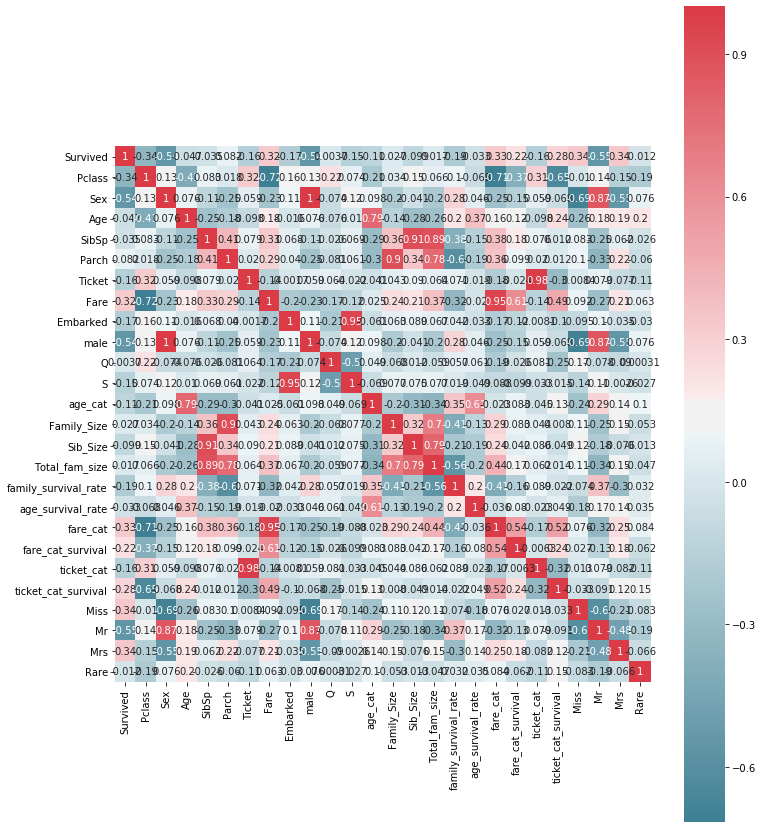

In [124]:
f,ax=plt.subplots(figsize=(12,15))
corr=train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [125]:
drop_variables=['Age','Sex','Embarked','Family_Size','Sib_Size','fare_cat','ticket_cat','age_survival_rate','SibSp','Total_fam_size','Mr']

In [126]:
train_data=train_data.drop(drop_variables,axis=1)
test_data=test_data.drop(drop_variables,axis=1)

In [127]:
train_data.head()

,Survived,Pclass,Parch,Ticket,Fare,male,Q,S,age_cat,family_survival_rate,fare_cat_survival,ticket_cat_survival,Miss,Mrs,Rare
0,0,3.0,0,523.0,7.2500,1,0,1,2,0.260234,0.195906,0.257310,0,0,0
1,1,1.0,0,596.0,65.6344,0,0,0,3,0.260234,0.324561,0.257310,0,1,0
2,1,3.0,0,669.0,7.9250,0,0,1,3,0.476608,0.195906,0.257310,1,0,0
3,1,1.0,0,49.0,53.1000,0,0,1,3,0.260234,0.324561,0.327485,0,1,0
4,0,3.0,0,472.0,8.0500,1,0,1,3,0.476608,0.195906,0.119883,0,0,0


In [128]:
test_data.head()

,Pclass,Parch,Ticket,Fare,male,Q,S,age_cat,family_survival_rate,fare_cat_survival,ticket_cat_survival,Miss,Mrs,Rare
0,3.0,0,152.0,7.8292,1,1,0,3,0.476608,0.195906,0.210526,0,0,0
1,3.0,0,221.0,7.0000,0,0,1,3,0.260234,0.195906,0.210526,0,1,0
2,2.0,0,73.0,9.6875,1,1,0,4,0.476608,0.195906,0.327485,0,0,0
3,3.0,0,147.0,8.6625,1,0,1,3,0.476608,0.195906,0.210526,0,0,0
4,3.0,1,138.0,12.2875,0,0,1,2,0.172515,0.137427,0.210526,0,1,0


In [129]:
train_data.shape,test_data.shape

((891, 15), (418, 14))

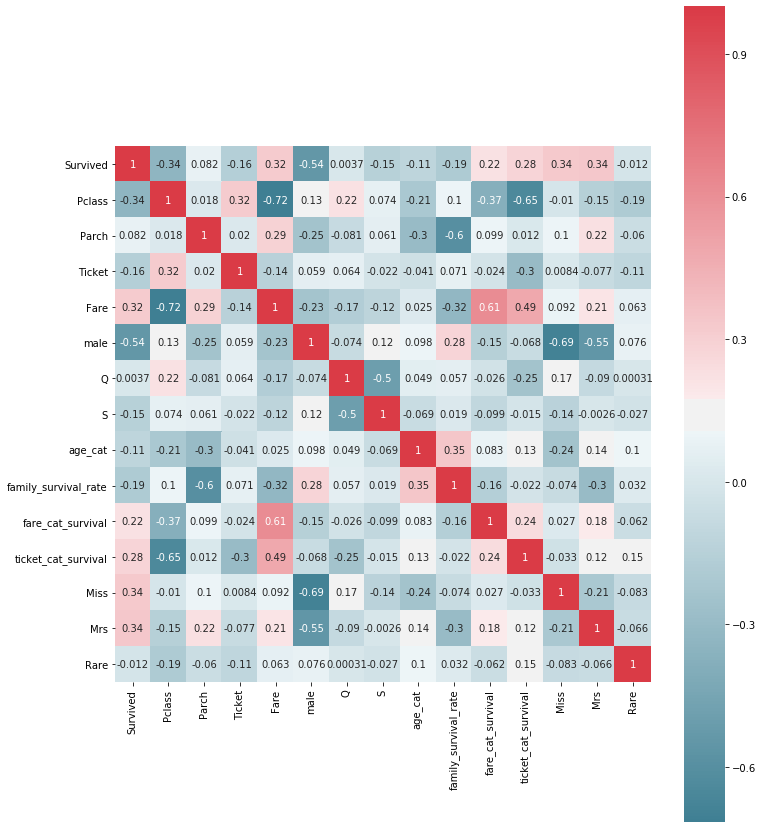

In [130]:
f,ax=plt.subplots(figsize=(12,15))
corr=train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Text(0, 0.5, 'Frequency')

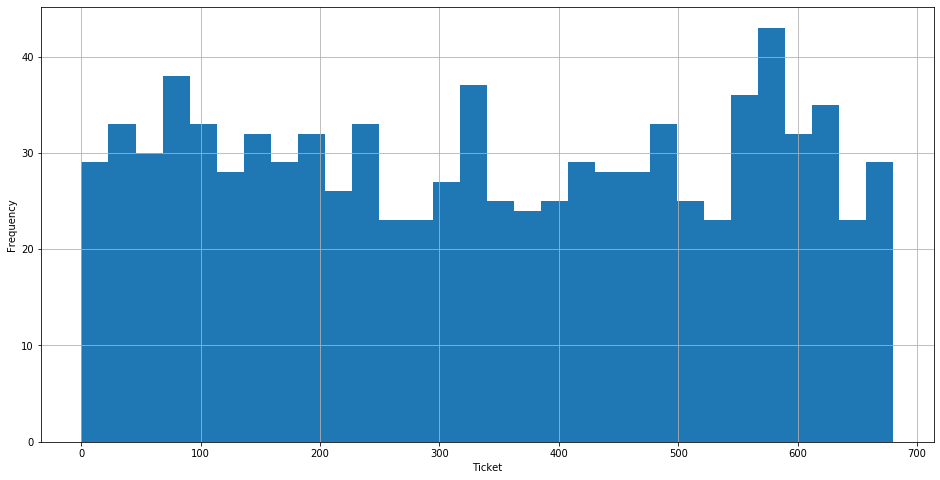

In [128]:
train_data['Ticket'].hist(bins=30,figsize=(16,8))
plt.xlabel("Ticket")
plt.ylabel("Frequency")

In [146]:
cols=test_data.columns
data=[train_data,test_data]
for df in data:
    for i in cols:
        df[i]=(df[i]-df[i].mean())/df[i].std()
    

In [147]:
train_data.head()

,Survived,Pclass,Parch,Ticket,Fare,male,Q,S,age_cat,family_survival_rate,fare_cat_survival,ticket_cat_survival,Miss,Mr,Mrs,Rare
0,0,0.826913,-0.473408,0.918450,-0.820092,0.737281,-0.30739,0.615493,-0.821165,-0.667336,-0.333564,0.564366,-0.511611,0.850054,-0.405612,-0.16269
1,1,-1.565228,-0.473408,1.281905,2.030483,-1.354813,-0.30739,-1.622891,0.414744,-0.667336,1.430504,0.564366,-0.511611,-1.175075,2.462644,-0.16269
2,1,0.826913,-0.473408,1.645359,-0.787135,-1.354813,-0.30739,0.615493,0.414744,0.680799,-0.333564,0.564366,1.952417,-1.175075,-0.405612,-0.16269
3,1,-1.565228,-0.473408,-1.441512,1.418500,-1.354813,-0.30739,0.615493,0.414744,-0.667336,1.430504,1.372049,-0.511611,-1.175075,2.462644,-0.16269
4,0,0.826913,-0.473408,0.664530,-0.781032,0.737281,-0.30739,0.615493,0.414744,0.680799,-0.333564,-1.017347,-0.511611,0.850054,-0.405612,-0.16269


In [148]:
test_data.head()

,Pclass,Parch,Ticket,Fare,male,Q,S,age_cat,family_survival_rate,fare_cat_survival,ticket_cat_survival,Miss,Mr,Mrs,Rare
0,0.872436,-0.399769,-0.269171,-0.792302,0.755024,2.840354,-1.349059,0.393431,0.752952,-0.166581,-0.055170,-0.482163,0.86017,-0.455626,-0.120533
1,0.872436,-0.399769,0.372488,-0.831410,-1.321292,-0.351227,0.739484,0.393431,-0.649572,-0.166581,-0.055170,-0.482163,-1.15978,2.189534,-0.120533
2,-0.315441,-0.399769,-1.003824,-0.704658,0.755024,2.840354,-1.349059,1.787111,0.752952,-0.166581,1.124414,-0.482163,0.86017,-0.455626,-0.120533
3,0.872436,-0.399769,-0.315668,-0.753001,0.755024,-0.351227,0.739484,0.393431,0.752952,-0.166581,-0.055170,-0.482163,0.86017,-0.455626,-0.120533
4,0.872436,0.619154,-0.399363,-0.582033,-1.321292,-0.351227,0.739484,-1.000249,-1.218162,-1.135697,-0.055170,-0.482163,-1.15978,2.189534,-0.120533


In [149]:
train_data.iloc[:,1:].head()

,Pclass,Parch,Ticket,Fare,male,Q,S,age_cat,family_survival_rate,fare_cat_survival,ticket_cat_survival,Miss,Mr,Mrs,Rare
0,0.826913,-0.473408,0.918450,-0.820092,0.737281,-0.30739,0.615493,-0.821165,-0.667336,-0.333564,0.564366,-0.511611,0.850054,-0.405612,-0.16269
1,-1.565228,-0.473408,1.281905,2.030483,-1.354813,-0.30739,-1.622891,0.414744,-0.667336,1.430504,0.564366,-0.511611,-1.175075,2.462644,-0.16269
2,0.826913,-0.473408,1.645359,-0.787135,-1.354813,-0.30739,0.615493,0.414744,0.680799,-0.333564,0.564366,1.952417,-1.175075,-0.405612,-0.16269
3,-1.565228,-0.473408,-1.441512,1.418500,-1.354813,-0.30739,0.615493,0.414744,-0.667336,1.430504,1.372049,-0.511611,-1.175075,2.462644,-0.16269
4,0.826913,-0.473408,0.664530,-0.781032,0.737281,-0.30739,0.615493,0.414744,0.680799,-0.333564,-1.017347,-0.511611,0.850054,-0.405612,-0.16269


In [150]:
train_data.isnull().sum()

Survived                0
Pclass                  0
Parch                   0
Ticket                  0
Fare                    0
male                    0
Q                       0
S                       0
age_cat                 0
family_survival_rate    0
fare_cat_survival       0
ticket_cat_survival     0
Miss                    0
Mr                      0
Mrs                     0
Rare                    0
dtype: int64

In [151]:
test_data.isnull().sum()

Pclass                  0
Parch                   0
Ticket                  0
Fare                    0
male                    0
Q                       0
S                       0
age_cat                 0
family_survival_rate    0
fare_cat_survival       0
ticket_cat_survival     0
Miss                    0
Mr                      0
Mrs                     0
Rare                    0
dtype: int64

# Building Models

In [154]:
x_train, x_test, y_train, y_test = train_test_split( train_data.iloc[:, train_data.columns != 'Survived'], 
                         train_data.iloc[:, 0], test_size = 0.20, random_state = 1)

In [155]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 14), (179, 14), (712,), (179,))

In [584]:
# Logistic regressor model
#lg_model=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.461074
         Iterations 6


In [585]:
#predictions=lg_model.predict(x_test)


In [586]:
#y_test_df=pd.DataFrame(y_test)

In [587]:
#y_test_df['pred']=predictions

In [588]:
#y_test_df['lg_pred']=0
#y_test_df.loc[y_test_df.pred>=0.5,'lg_pred']=1

In [589]:
#y_test_df.head()

,Survived,pred,lg_pred
862,1.0,0.956092,1
223,0.0,0.086654,0
84,1.0,0.936219,1
680,0.0,0.820029,1
535,1.0,0.941736,1


In [590]:
#cm=pd.crosstab(y_test_df['Survived'],y_test_df['lg_pred'])
#cm

lg_pred,0,1
Survived,,
0.0,82,24
1.0,15,58


In [ ]:
(82+58)/(82+58+24+15) # accuracy 78.2%

In [ ]:
15/(15+58) # FNR 20.54%

In [591]:
#complete_lg_model=sm.Logit(train_data.iloc[:,0],train_data.iloc[:,1:]).fit()

Optimization terminated successfully.
         Current function value: 0.466804
         Iterations 6


In [592]:
#test_probs=complete_lg_model.predict(test_data)

In [593]:
#test_data['survival_prob']=test_probs
#test_data['Survived']=0
#test_data.loc[test_data['survival_prob']>0.5,'Survived']=1

In [594]:
test_data.head()

,Pclass,Sex,Parch,Ticket,Fare,Embarked,age_cat,family_survival_rate,ticket_cat_survival,Title,survival_prob,Survived
0,0.872436,0.755024,-0.399769,-0.269171,-0.792535,-0.470352,0.464620,0.752952,-0.055170,0.113033,0.175885,0
1,0.872436,-1.321292,-0.399769,0.372488,-0.831647,0.699928,0.464620,-0.649572,-0.055170,1.390006,0.701421,1
2,-0.315441,0.755024,-0.399769,-1.003824,-0.704882,-0.470352,1.822739,0.752952,1.124414,0.113033,0.293261,0
3,0.872436,0.755024,-0.399769,-0.315668,-0.753229,0.699928,0.464620,0.752952,-0.055170,0.113033,0.142295,0
4,0.872436,-1.321292,0.619154,-0.399363,-0.582243,0.699928,-0.893500,-1.218162,-0.055170,1.390006,0.766418,1


In [142]:
sub_test_data=pd.read_csv('test.csv')

In [ ]:
#sub_test_data.head()

In [601]:
#log_submission=pd.DataFrame({'PassengerId':sub_test_data['PassengerId'].values,'Survived':test_data['Survived'].values})

In [602]:
#log_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [603]:
log_submission.to_csv('submission.csv',index=False)

In [578]:
lr=LogisticRegression(penalty='l1',max_iter=100,dual=False)

In [579]:
lr_mod=lr.fit(x_train,y_train)

C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [580]:
lr_mod.score(x_train,y_train)

0.8202247191011236

In [581]:
kfold=KFold(n_splits=3,random_state=1)

In [582]:
result=cross_val_score(lr,x_train,y_train,cv=kfold,scoring='accuracy')

C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [583]:
print(result.mean())

0.8047961800754058


In [604]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [0.001,0.01,0.1,1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [605]:
lr=LogisticRegression(penalty='l2')
grid=GridSearchCV(estimator=lr,param_grid=param_grid,n_jobs=1,cv=3)
start_time=time.time()
grid_result=grid.fit(x_train,y_train)
print("best score is %f usin %s"%(grid_result.best_score_,grid_result.best_params_))
print('Execution time'+str((time.time()-start_time))+'s')

C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

best score is 0.803371 usin {'C': 0.1, 'dual': True, 'max_iter': 100}
Execution time2.2344703674316406s


C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver

In [606]:
grid_predict=grid_result.predict(x_test)

In [607]:
cm=pd.crosstab(y_test,grid_predict)
cm

col_0,0.0,1.0
Survived,,
0.0,93,13
1.0,24,49


In [127]:
(92+49)/(92+14+24+49) # accuracy=0.787709

0.7877094972067039

In [128]:
24/(24+49) # FNR 32.87

0.3287671232876712

In [608]:
random=RandomizedSearchCV(estimator=lr,param_distributions=param_grid,n_jobs=1,cv=3)
start_time=time.time()
random_result=random.fit(x_train,y_train)
print("best score is %f usin %s"%(random_result.best_score_,random_result.best_params_))
print('Execution time'+str((time.time()-start_time))+'s')

C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

best score is 0.801966 usin {'max_iter': 100, 'dual': True, 'C': 1.0}
Execution time0.3580806255340576s


C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

In [609]:
random_predict=random_result.predict(x_test)

In [610]:
cm=pd.crosstab(y_test,random_predict)
cm

col_0,0.0,1.0
Survived,,
0.0,92,14
1.0,24,49


In [ ]:
(92+49)/(92+24+14+49)

In [ ]:
24/(24+49)

# DecissionTree Model

In [154]:
param_list={'max_depth':range(2,10),'criterion':['gini','entropy'],'min_samples_leaf':randint(1,12),'max_leaf_nodes':range(10,30)}
tree=DecisionTreeClassifier(random_state=11)
tree_cv = RandomizedSearchCV(tree, param_list, cv=3)
start_time=time.time()
tree_model=tree_cv.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
print("best score is %f at best parameters of %s "%(tree_model.best_score_,tree_model.best_params_))
print('exwcution time: '+ str(time.time()-start_time)+'s')

best score is 0.813692 at best parameters of {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 23, 'min_samples_leaf': 7} 
exwcution time: 0.1077125072479248s


In [155]:
dt_p=tree_model.best_estimator_.predict(test_data)

In [158]:
submission5=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':dt_p})
submission5['Survived']=submission5['Survived'].astype(int)
submission5.to_csv('submission5.csv',index=False)

In [159]:
max_leaf_node= range(10,30)
test_acc = []
for depth,max_leaf_node in zip(range(1,21),max_leaf_node):
    dt_model=DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=max_leaf_node).fit(x_train,y_train)
    dt_predictions=dt_model.predict(x_test)
    test_acc.append(accuracy_score(y_test,dt_predictions))

In [160]:
dt_frame=pd.DataFrame({'max_depth':range(1,21),'max_leaf_node':range(10,30),'test_accuracy':test_acc})
dt_frame

,max_depth,max_leaf_node,test_accuracy
0,1,10,0.743017
1,2,11,0.737430
2,3,12,0.815642
3,4,13,0.804469
4,5,14,0.804469
5,6,15,0.804469
6,7,16,0.770950
7,8,17,0.776536
8,9,18,0.787709
9,10,19,0.793296


In [161]:
best_param=dt_frame.loc[dt_frame['test_accuracy']==max(dt_frame['test_accuracy'])].index
best_depth=int(dt_frame.iloc[best_param[0],0])
best_leaf=int(dt_frame.iloc[best_param[0],1])

In [162]:
best_depth,best_leaf

(3, 12)

In [163]:
dt_model=DecisionTreeClassifier(max_depth = best_depth,max_leaf_nodes=best_leaf).fit(train_data.iloc[:,1:],train_data.iloc[:,0])

In [164]:
dt_pred=dt_model.predict(test_data)

In [165]:
submission5=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':dt_pred})

In [166]:
submission5['Survived']=submission5['Survived'].astype(int)

In [167]:
submission5.to_csv('submission5.csv',index=False)

In [ ]:
cm=pd.crosstab(y_test,tree_predictions)
cm

In [ ]:
(94+49)/(94+12+24+49) #0.7988826815642458

In [ ]:
24/(24+49) #0.3287671232876712

In [168]:
param_list={'max_depth':range(2,10),'criterion':['gini','entropy'],'min_samples_leaf':range(1,12),'max_leaf_nodes':range(10,30)}
tree=DecisionTreeClassifier()
grid_cv = GridSearchCV(tree, param_list, cv=3)
start_time=time.time()
tree_model=grid_cv.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
print("best score is %f at best parameters of %s "%(tree_model.best_score_,tree_model.best_params_))
print('exwcution time: '+ str(time.time()-start_time)+'s')

best score is 0.829405 at best parameters of {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 25, 'min_samples_leaf': 1} 
exwcution time: 35.07166004180908s


In [169]:
cv_dt_predictions=tree_model.best_estimator_.predict(test_data)

In [ ]:
#grid_predict=grid_cv.predict(x_test)

In [ ]:
#cm=pd.crosstab(y_test,grid_predict)
#cm

In [ ]:
(96+50)/96+10+23+50 #84.52083

In [ ]:
24/(24+49) #0.3282352941

In [170]:
submission6=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':cv_dt_predictions})

submission6['Survived']=submission6['Survived'].astype(int)

submission6.to_csv('submission6.csv',index=False) #77.99

# Random forest classifier

In [171]:
base_model=RandomForestClassifier(random_state=11)
base_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [172]:
param_grid={'bootstrap':["True","False"],'n_estimators':list(range(100,500)),'max_depth':list(range(2,100)),'max_features':['auto','sqrt'],
           'criterion':['gini','entropy']}

In [174]:
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,random_state=11,n_iter=200,verbose=1)
start_time=time.time()
rf_model=rf_random.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
print("best score is %f at best parameters of %s "%(rf_model.best_score_,rf_model.best_params_))
print('execution time: '+ str(time.time()-start_time)+'s')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.0min finished


best score is 0.829405 at best parameters of {'n_estimators': 373, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': 'True'} 
execution time: 300.7248158454895s


In [175]:
rf_predict=rf_model.best_estimator_.predict(test_data)

In [176]:
submission7=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':rf_predict})

submission7['Survived']=submission7['Survived'].astype(int)

submission7.to_csv('submission7.csv',index=False)

In [158]:
cm=pd.crosstab(y_test,rf_predict)
TP=cm.iloc[1,1]
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
cm

col_0,0.0,1.0
Survived,,
0.0,98,8
1.0,28,45


In [159]:
(TP+TN)/(TP+TN+FP+FN)

0.7988826815642458

In [160]:
FN/(FN+TP)

0.3835616438356164

In [ ]:
random_rf_model=RandomForestClassifier()

In [161]:
rrf=RandomForestClassifier().fit(x_train,y_train)

C:\Users\rakshith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [162]:
p=rrf.predict(x_test)

In [163]:
cm=pd.crosstab(y_test,p)
TP=cm.iloc[1,1]
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
cm

col_0,0.0,1.0
Survived,,
0.0,94,12
1.0,26,47


In [164]:
(TP+TN)/(TP+TN+FP+FN)

0.7877094972067039

In [165]:
FN/(FN+TP)

0.3561643835616438

In [166]:
RF = RandomForestClassifier(random_state = 0)
n_estimator = list(range(1,500,2))
depth = list(range(1,50,2))

In [167]:
grid = {'n_estimators': n_estimator,
               'max_depth': depth}

In [168]:
randomcv_rf = RandomizedSearchCV(RF, param_distributions = grid, n_iter = 5, cv = 5, random_state=0,verbose=1)

In [169]:
randomcv_rf_model = randomcv_rf.fit(x_train,y_train)
rf_predictions = randomcv_rf_model.predict(x_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.1s finished


In [170]:
randomcv_rf_model.best_params_

{'n_estimators': 307, 'max_depth': 13}

In [171]:
cm=pd.crosstab(y_test,rf_predictions)
TP=cm.iloc[1,1]
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
cm

col_0,0.0,1.0
Survived,,
0.0,95,11
1.0,27,46


In [172]:
(TP+TN)/(TP+TN+FP+FN)

0.7877094972067039

In [173]:
FN/(FN+TP)

0.3698630136986301

# XGBoost Model

In [131]:
D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test)

NameError: name 'x_train' is not defined

In [132]:
train_complete=xgb.DMatrix(train_data.iloc[:,1:],label=train_data['Survived'])

C:\Users\rakshith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\rakshith\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [133]:
test_complete=xgb.DMatrix(test_data)

In [151]:
param = {
    'eta': 0.3, 
    'max_depth': 4,  
    'objective': 'binary:logistic',  
    'subsample':0.8,'colsample_bytree':1} 

steps = 20

In [152]:
model = xgb.train(param, D_train, steps)


In [179]:
preds = model.predict(D_test)

In [180]:
y_test_df=pd.DataFrame(y_test)

In [181]:
y_test_df['xgb1_probs']=preds
y_test_df['xgb1_predictions']=0
y_test_df.loc[y_test_df['xgb1_probs']>=0.5,'xgb1_predictions']=1

In [182]:
y_test_df.head()

,Survived,xgb1_probs,xgb1_predictions
862,1.0,0.893525,1
223,0.0,0.044029,0
84,1.0,0.939719,1
680,0.0,0.738385,1
535,1.0,0.949602,1


In [183]:
print("Precision = {}".format(precision_score(y_test, y_test_df['xgb1_predictions'], average='macro')))
print("Recall = {}".format(recall_score(y_test,y_test_df['xgb1_predictions'], average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_test_df['xgb1_predictions'])))

Precision = 0.7859689922480619
Recall = 0.7383690876195399
Accuracy = 0.770949720670391


In [184]:
cm=pd.crosstab(y_test,y_test_df['xgb1_predictions'])
TP=cm.iloc[1,1]
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
cm

xgb1_predictions,0,1
Survived,,
0.0,97,9
1.0,32,41


In [185]:
(TP+TN)/(TP+TN+FP+FN)

0.770949720670391

In [186]:
FN/(FN+TP)

0.4383561643835616

In [187]:
xgb1=XGBClassifier(learning_rate=0.3,n_estimators=250,max_depth=3,min_child_weight=1,
                   sub_sample=0.8,objective='binary:logistic')

In [188]:
x_model=xgb1.fit(x_train,y_train)

In [189]:
x_predictions=x_model.predict(x_test)

In [190]:
cm=pd.crosstab(y_test,x_predictions)
TP=cm.iloc[1,1]
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
cm

col_0,0.0,1.0
Survived,,
0.0,97,9
1.0,24,49


In [191]:
(TP+TN)/(TP+TN+FP+FN)

0.8156424581005587

In [192]:
FN/(FN+TP)

0.3287671232876712

In [134]:
# Using CV
parameters= {'learning_rate':0.1,'n_estimators':200,'max_depth':4,'min_child_weight':1,
             'gamma':0,'subsample':0.9,'colsample_bytree':0.8,'objective': 'binary:logistic'}

In [135]:
cv_results = xgb.cv(dtrain=train_complete, params=parameters, nfold=3,
                    num_boost_round=500,early_stopping_rounds=100,metrics="auc",  verbose_eval=1, seed=123)

[0]	train-auc:0.83041+0.0198335	test-auc:0.767138+0.00884494
[1]	train-auc:0.884786+0.00908683	test-auc:0.837181+0.0261759
[2]	train-auc:0.892717+0.00793361	test-auc:0.852401+0.0324544
[3]	train-auc:0.897936+0.00707778	test-auc:0.858921+0.0306742
[4]	train-auc:0.898667+0.00767224	test-auc:0.860824+0.0328931
[5]	train-auc:0.900634+0.00687064	test-auc:0.86429+0.0324632
[6]	train-auc:0.902899+0.00638257	test-auc:0.863693+0.0328056
[7]	train-auc:0.903599+0.00660719	test-auc:0.863212+0.0320747
[8]	train-auc:0.906138+0.0079285	test-auc:0.863105+0.0295431
[9]	train-auc:0.907432+0.0074726	test-auc:0.863414+0.0314955
[10]	train-auc:0.908406+0.00839295	test-auc:0.863356+0.0314657
[11]	train-auc:0.908851+0.00865036	test-auc:0.862591+0.0315066
[12]	train-auc:0.911978+0.00826347	test-auc:0.862352+0.0291471
[13]	train-auc:0.914544+0.00702342	test-auc:0.86275+0.0282494
[14]	train-auc:0.915131+0.00626342	test-auc:0.863053+0.028054
[15]	train-auc:0.916092+0.00667864	test-auc:0.862129+0.0299366
[16]	tra

In [136]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.830410,0.019833,0.767138,0.008845
1,0.884786,0.009087,0.837181,0.026176
2,0.892717,0.007934,0.852401,0.032454
3,0.897936,0.007078,0.858921,0.030674
4,0.898667,0.007672,0.860824,0.032893
5,0.900634,0.006871,0.864290,0.032463
6,0.902899,0.006383,0.863693,0.032806
7,0.903599,0.006607,0.863212,0.032075
8,0.906138,0.007928,0.863105,0.029543
9,0.907432,0.007473,0.863414,0.031496


In [137]:
print((cv_results["test-auc-mean"]).tail(1))

41    0.868953
Name: test-auc-mean, dtype: float64


In [138]:
best_boost_round=cv_results.loc[cv_results['test-auc-mean']==max(cv_results['test-auc-mean'])].index[0]
best_boost_round

41

In [139]:
xg_classifier = xgb.train(params=parameters, dtrain=train_complete, num_boost_round=best_boost_round)

In [140]:
xg_cv_predic=xg_classifier.predict(test_complete)

In [153]:
#y_test_df['xg_probs']=xg_cv_predic
#y_test_df['xg_predictions']=0
#y_test_df.loc[y_test_df['xg_probs']>=0.5,'xg_predictions']=1

In [143]:
sub_test_data['xg_probs']=xg_cv_predic
sub_test_data['Survived']=0
sub_test_data.loc[sub_test_data['xg_probs']>=0.5,'Survived']=1

In [144]:
sub_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,xg_probs,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.170318,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.599642,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.247840,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.152196,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.684913,1


In [145]:
submission2=sub_test_data[['PassengerId','Survived']]

In [146]:
submission2.to_csv('submission2.csv',index=False)

In [147]:
submission2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [650]:
param_cvgrid={'max_depth':list(range(2,10)),'min_child_weight':list(range(1,8)),'n_estimators':range(50,250)}

In [651]:
xgb_model=XGBClassifier(learning_rate=0.3,objective= 'binary:logistic',
                        colsample_bytree=1)

In [652]:
gridsearch=GridSearchCV(estimator=xgb_model,param_grid = param_cvgrid,scoring='roc_auc',cv=3,
                        verbose=1)

In [653]:
dr_model=gridsearch.fit(train_data.iloc[:,1:],train_data.iloc[:,0])

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   25.2s finished


In [369]:
 dr_model.best_params_, dr_model.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.8622056050873997)

In [654]:
xg_cv_pred=dr_model.best_estimator_.predict(test_data)

In [655]:
submission3=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':xg_cv_pred})

In [656]:
submission3['Survived']=submission3['Survived'].astype(int)

In [657]:
submission3.to_csv('submission3.csv',index=False)

In [ ]:
#cm=pd.crosstab(y_test,xg_cv_pred)
#TP=cm.iloc[1,1]
#TN=cm.iloc[0,0]
#FN=cm.iloc[1,0]
#FP=cm.iloc[0,1]
#cm

In [ ]:
(TP+TN)/(TP+TN+FP+FN)

In [ ]:
FN/(FN+TP)

In [159]:
param_grid={'sub_sample':[i/10 for i in range(2,10)],'colsample_bytree':[i/10 for i in range(2,10)],
               'n_estimators':range(30,250),'learning_rate':[0.08,0.1,0.2,0.3,0.5],'max_depth':list(range(2,10)),'min_child_weight':list(range(1,8,))}

In [160]:
xgb_model=XGBClassifier(objective= 'binary:logistic',random_state=11)
                        

In [376]:
#gridsearch=GridSearchCV(estimator=xgb_model,param_grid = param_cvgrid,scoring='roc_auc',cv=3,
                        #verbose=2)

In [161]:
randomsearch=RandomizedSearchCV(estimator=xgb_model,param_distributions=param_grid,scoring='roc_auc',cv=3)

In [162]:
r_model=randomsearch.fit(train_data.iloc[:,1:],train_data.iloc[:,0])

In [163]:
 r_model.best_params_, r_model.best_score_

({'sub_sample': 0.7,
  'n_estimators': 124,
  'min_child_weight': 4,
  'max_depth': 2,
  'learning_rate': 0.3,
  'colsample_bytree': 0.2},
 0.8750838845748249)

In [227]:
random_xgb=XGBClassifier(colsample_bytree=0.3, sub_sample= 0.7,learning_rate=0.08, max_depth= 2, min_child_weight=5,
                      scoring='roc_auc',cv=3,objective= 'binary:logistic',n_estimators=246,verbose=2)

In [228]:
#random_xgb_model= random_xgb.fit(x_train,y_train)

In [164]:
random_xg_pred=r_model.best_estimator_.predict(test_data)

In [165]:
submission4=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':random_xg_pred})

In [166]:
submission4['Survived']=submission4['Survived'].astype(int)

In [167]:
submission4.to_csv('submission4.csv',index=False)

In [ ]:
#cm=pd.crosstab(y_test,random_xg_pred)
#TP=cm.iloc[1,1]
#TN=cm.iloc[0,0]
#FN=cm.iloc[1,0]
#FP=cm.iloc[0,1]
#cm

In [231]:
(TP+TN)/(TP+TN+FP+FN)

0.776536312849162

In [232]:
FN/(FN+TP)

0.3835616438356164

# Tensorflow classification

In [148]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [156]:
X_train = x_train.values

In [157]:
X_test = x_test.values
Y_train = y_train.values
Y_test = y_test.values

In [357]:
model = Sequential()

model.add(Dense(units = 15,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 7,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 3,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1,'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimization = 'adam')

In [358]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=50,mode='min',verbose=1)

In [359]:
model.fit(X_train,Y_train, epochs=400,
          verbose=1,
          callbacks=[early_stop],
          validation_data=(X_test,Y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/400
712/712 [==============================] - 1s 804us/sample - loss: 0.7673 - val_loss: 0.7229
Epoch 2/400
712/712 [==============================] - 0s 62us/sample - loss: 0.7152 - val_loss: 0.6967
Epoch 3/400
712/712 [==============================] - 0s 68us/sample - loss: 0.6891 - val_loss: 0.6807
Epoch 4/400
712/712 [==============================] - 0s 66us/sample - loss: 0.6658 - val_loss: 0.6690
Epoch 5/400
712/712 [==============================] - 0s 66us/sample - loss: 0.6517 - val_loss: 0.6561
Epoch 6/400
712/712 [==============================] - 0s 63us/sample - loss: 0.6456 - val_loss: 0.6421
Epoch 7/400
712/712 [==============================] - 0s 63us/sample - loss: 0.6284 - val_loss: 0.6298
Epoch 8/400
712/712 [==============================] - 0s 66us/sample - loss: 0.6093 - val_loss: 0.6207
Epoch 9/400
712/712 [==============================] - 0s 63us/sample - loss: 0.5993 - val_loss: 0.6109
Epoch 10/400
712/

In [360]:
loss_df = pd.DataFrame(model.history.history)

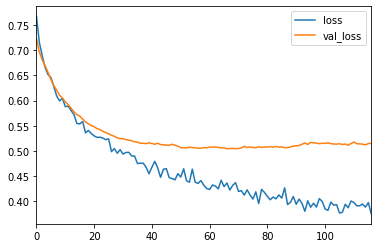

In [361]:
loss_df.plot()

In [362]:
model_pred = model.predict_classes(X_test)

In [363]:
preds = model_pred.reshape(len(model_pred),)

In [364]:
cm =pd.crosstab(Y_test,preds)
TP = cm.iloc[1,1]
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]

In [365]:
(TP+TN)/(TP+TN+FP+FN)

0.7877094972067039

In [366]:
FN/(FN+TP)

0.3972602739726027

In [149]:
# training on complete data
train = train_data.iloc[:,1:].values
label = train_data.iloc[:,0].values

In [150]:
test = test_data.values

In [151]:
model = Sequential()

model.add(Dense(units = 15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 3,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1,'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimization = 'adam')

In [152]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=50,mode='min',verbose=1)

In [165]:
model.fit(train,label, epochs=600,
          verbose=1,
          callbacks=[early_stop],
          validation_data=(X_test,Y_test))

Train on 891 samples, validate on 179 samples
Epoch 1/600
891/891 [==============================] - 0s 57us/sample - loss: 0.5395 - val_loss: 0.4858
Epoch 2/600
891/891 [==============================] - 0s 53us/sample - loss: 0.5144 - val_loss: 0.4819
Epoch 3/600
891/891 [==============================] - 0s 57us/sample - loss: 0.5050 - val_loss: 0.4811
Epoch 4/600
891/891 [==============================] - 0s 60us/sample - loss: 0.5119 - val_loss: 0.5065
Epoch 5/600
891/891 [==============================] - 0s 60us/sample - loss: 0.4920 - val_loss: 0.4765
Epoch 6/600
891/891 [==============================] - 0s 60us/sample - loss: 0.5190 - val_loss: 0.4884
Epoch 7/600
891/891 [==============================] - 0s 60us/sample - loss: 0.5091 - val_loss: 0.4880
Epoch 8/600
891/891 [==============================] - 0s 57us/sample - loss: 0.5188 - val_loss: 0.4810
Epoch 9/600
891/891 [==============================] - 0s 52us/sample - loss: 0.5198 - val_loss: 0.4931
Epoch 10/600
891/8

In [166]:
loss_df=pd.DataFrame(model.history.history)

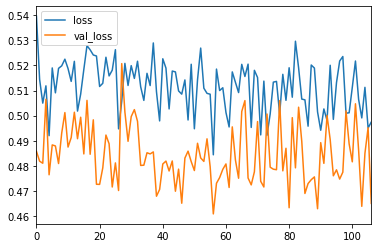

In [167]:
loss_df.plot()

In [168]:
predictions = model.predict_classes(test)

In [169]:
predictions = predictions.reshape(len(predictions),)

In [170]:
T_submission=pd.DataFrame({'PassengerId':sub_test_data.iloc[:,0],'Survived':predictions})

In [171]:
T_submission.to_csv('T_submission.csv',index=False)